<a href="https://colab.research.google.com/github/jsambhav5/size-prediction/blob/main/Body_Size_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
dataset = Path("__file__").parents[0].joinpath('datasets/Body_Measurements_original.csv')
df = pd.read_csv(dataset)
df

,Gender,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight,Size
0,1.0,40.0,18.0,20.0,18.0,14.0,22.0,22.0,25.0,25.0,22.0,52.0,L
1,1.0,19.0,22.0,17.0,18.0,21.0,25.0,28.0,23.0,25.0,20.0,56.0,M
2,2.0,21.0,18.0,16.0,14.0,10.0,15.0,21.0,18.0,14.0,18.0,53.0,L
3,1.0,20.0,20.0,18.0,11.0,19.0,14.0,24.0,21.0,20.0,21.0,45.0,M
4,2.0,16.0,14.0,18.0,13.0,11.0,30.0,25.0,22.0,32.0,13.0,47.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Gender', 'HeadCircumference', 'ShoulderWidth', 'ChestWidth', 'Belly',
       'Waist', 'Hips', 'ArmLength', 'ShoulderToWaist', 'WaistToKnee',
       'LegLength', 'TotalHeight', 'Size'],
      dtype='object')

In [4]:
df


,Gender,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight,Size
0,1.0,40.0,18.0,20.0,18.0,14.0,22.0,22.0,25.0,25.0,22.0,52.0,L
1,1.0,19.0,22.0,17.0,18.0,21.0,25.0,28.0,23.0,25.0,20.0,56.0,M
2,2.0,21.0,18.0,16.0,14.0,10.0,15.0,21.0,18.0,14.0,18.0,53.0,L
3,1.0,20.0,20.0,18.0,11.0,19.0,14.0,24.0,21.0,20.0,21.0,45.0,M
4,2.0,16.0,14.0,18.0,13.0,11.0,30.0,25.0,22.0,32.0,13.0,47.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.iloc[0:399, :]
df

,Gender,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight,Size
0,1.0,40.0,18.0,20.0,18.0,14.0,22.0,22.0,25.0,25.0,22.0,52.0,L
1,1.0,19.0,22.0,17.0,18.0,21.0,25.0,28.0,23.0,25.0,20.0,56.0,M
2,2.0,21.0,18.0,16.0,14.0,10.0,15.0,21.0,18.0,14.0,18.0,53.0,L
3,1.0,20.0,20.0,18.0,11.0,19.0,14.0,24.0,21.0,20.0,21.0,45.0,M
4,2.0,16.0,14.0,18.0,13.0,11.0,30.0,25.0,22.0,32.0,13.0,47.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,1.0,18.0,18.0,9.0,19.0,12.0,9.0,14.0,11.0,13.0,21.0,42.0,L
395,1.0,20.0,12.0,9.0,10.0,23.0,10.0,12.0,17.0,12.0,22.0,45.0,M
396,1.0,21.0,13.0,11.0,10.0,21.0,10.0,13.0,17.0,12.0,22.0,45.0,M
397,1.0,20.0,17.0,11.0,22.0,22.0,22.0,17.0,12.0,12.0,22.0,40.0,S


In [6]:
df.describe()

,Gender,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,1.350877,20.829574,16.117794,16.761905,19.150376,20.974937,21.335840,19.553885,20.228070,18.122807,28.441103,50.766917
std,0.477844,4.923641,5.400415,6.051367,13.291379,10.104200,9.775495,6.419699,5.490111,5.816063,9.401749,14.674125
min,1.000000,9.000000,5.000000,6.000000,5.000000,6.000000,7.000000,6.000000,7.000000,4.000000,9.000000,19.000000
25%,1.000000,19.000000,14.000000,12.000000,12.000000,14.000000,15.000000,16.000000,17.000000,14.000000,20.000000,42.000000
50%,1.000000,21.000000,17.000000,16.000000,17.000000,20.000000,20.000000,20.000000,20.000000,19.000000,29.000000,52.000000
75%,2.000000,23.000000,19.000000,20.000000,23.000000,25.000000,26.000000,23.000000,24.000000,21.000000,37.000000,60.000000
max,2.000000,80.000000,87.000000,38.000000,213.000000,91.000000,63.000000,66.000000,39.000000,45.000000,49.000000,89.000000


In [7]:
df.shape

(399, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             399 non-null    float64
 1   HeadCircumference  399 non-null    float64
 2   ShoulderWidth      399 non-null    float64
 3   ChestWidth         399 non-null    float64
 4   Belly              399 non-null    float64
 5   Waist              399 non-null    float64
 6   Hips               399 non-null    float64
 7   ArmLength          399 non-null    float64
 8   ShoulderToWaist    399 non-null    float64
 9   WaistToKnee        399 non-null    float64
 10  LegLength          399 non-null    float64
 11  TotalHeight        399 non-null    float64
 12  Size               399 non-null    object 
dtypes: float64(12), object(1)
memory usage: 40.6+ KB


In [9]:
for i in df.columns :
  print(f'{i} => {df[i].unique()}\n-------------***-----------------\n')

Gender => [1. 2.]
-------------***-----------------

HeadCircumference => [40. 19. 21. 20. 16. 17. 25. 18. 15. 23. 24. 80. 28. 29. 14. 22. 27. 26.
 12. 13. 11. 10.  9.]
-------------***-----------------

ShoulderWidth => [18. 22. 20. 14. 19. 17. 15. 16. 28. 21.  9. 13.  7. 11. 10.  8. 12. 23.
  6.  5. 87. 26.]
-------------***-----------------

ChestWidth => [20. 17. 16. 18. 19. 28. 21. 22. 14. 15. 10.  8. 13. 11.  7. 12.  9. 23.
  6. 26. 27. 31. 37. 38. 32. 29. 25. 30.]
-------------***-----------------

Belly => [ 18.  14.  11.  13.  17.  15.  12.  16.   9.  19.  10.   8.   6.  22.
  21.   7.  20. 213.  23.  24.   5.  29.  30.  34.  37.  27.  28.  25.
  32.  36.  26.  44.  42.  33.  46.  41.  45.  47.  40.  43.  35.  31.]
-------------***-----------------

Waist => [14. 21. 10. 19. 11. 16. 12. 23. 22. 91. 18. 20. 24. 25. 17. 15. 13.  9.
  7.  8. 50. 49. 36. 26. 60. 31. 29. 52. 40. 27.  6. 30. 32. 37. 41. 28.
 33. 34. 42. 38. 48. 47. 45. 39. 43. 44. 35.]
-------------***--------------

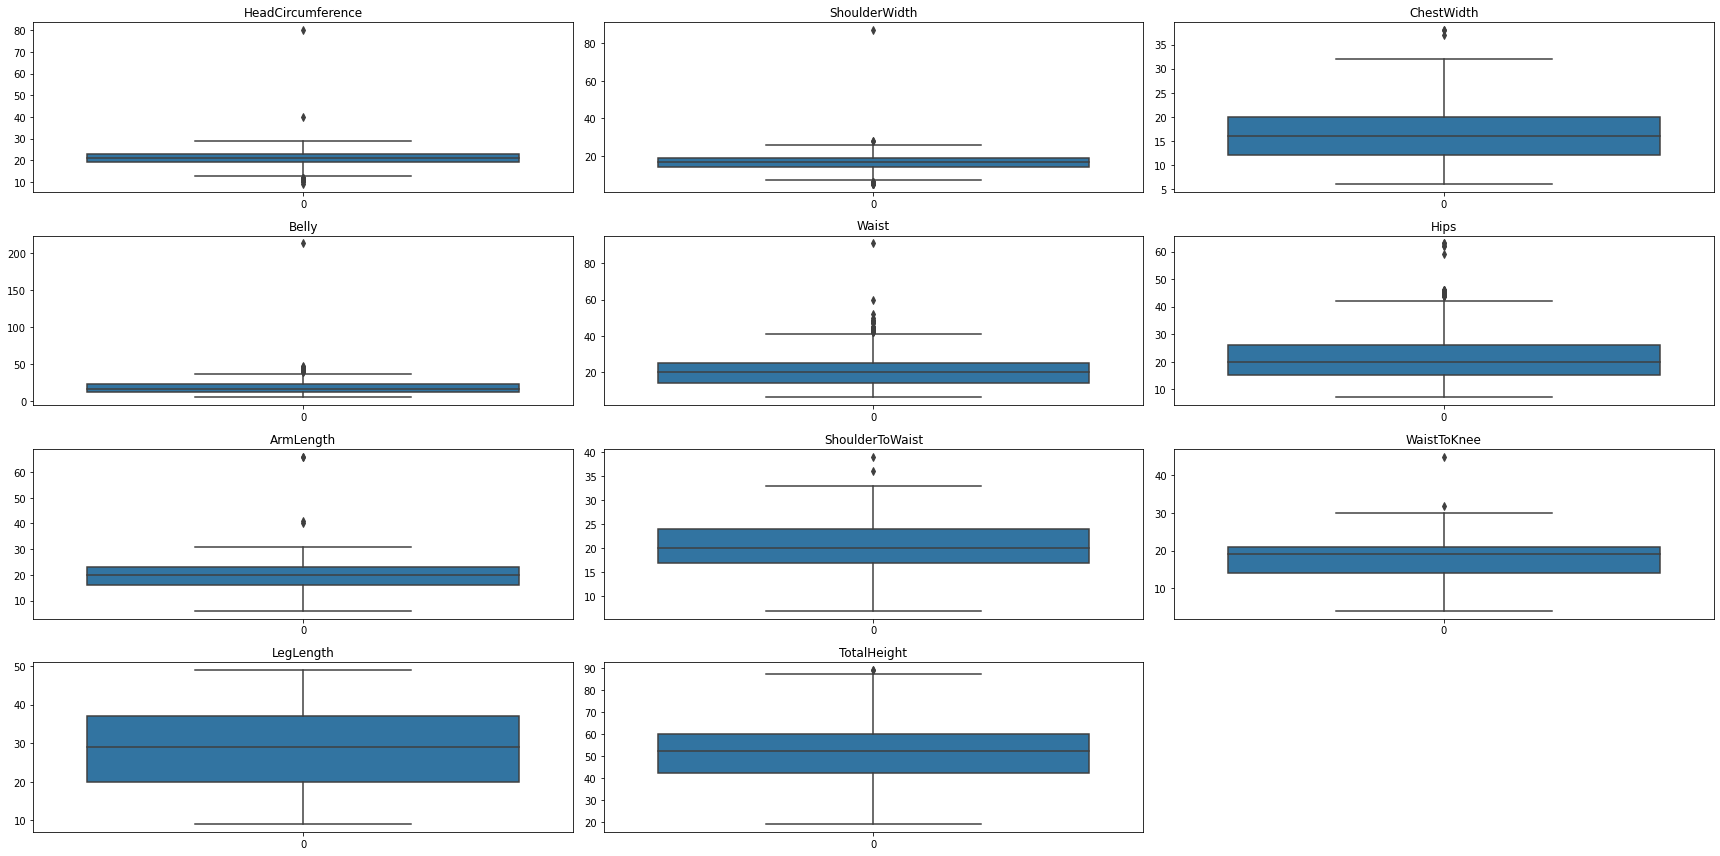

In [10]:
# Selecting only continuous variables
continuous_vars = ['HeadCircumference', 'ShoulderWidth', 'ChestWidth', 'Belly',
       'Waist', 'Hips', 'ArmLength', 'ShoulderToWaist', 'WaistToKnee',
       'LegLength', 'TotalHeight']

# Plot boxplots for continuous variables to detect outliers
plt.figure(figsize=(24, 12))
for i, var in enumerate(continuous_vars):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

In [11]:
#Remove or clip outliers between 5th and 95th percentiles
for var in continuous_vars:
    lower_bound = np.percentile(df[var], 5)
    upper_bound = np.percentile(df[var], 95)
    df[var] = np.clip(df[var], lower_bound, upper_bound)

<ipython-input-11-072ddf0e7370>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = np.clip(df[var], lower_bound, upper_bound)


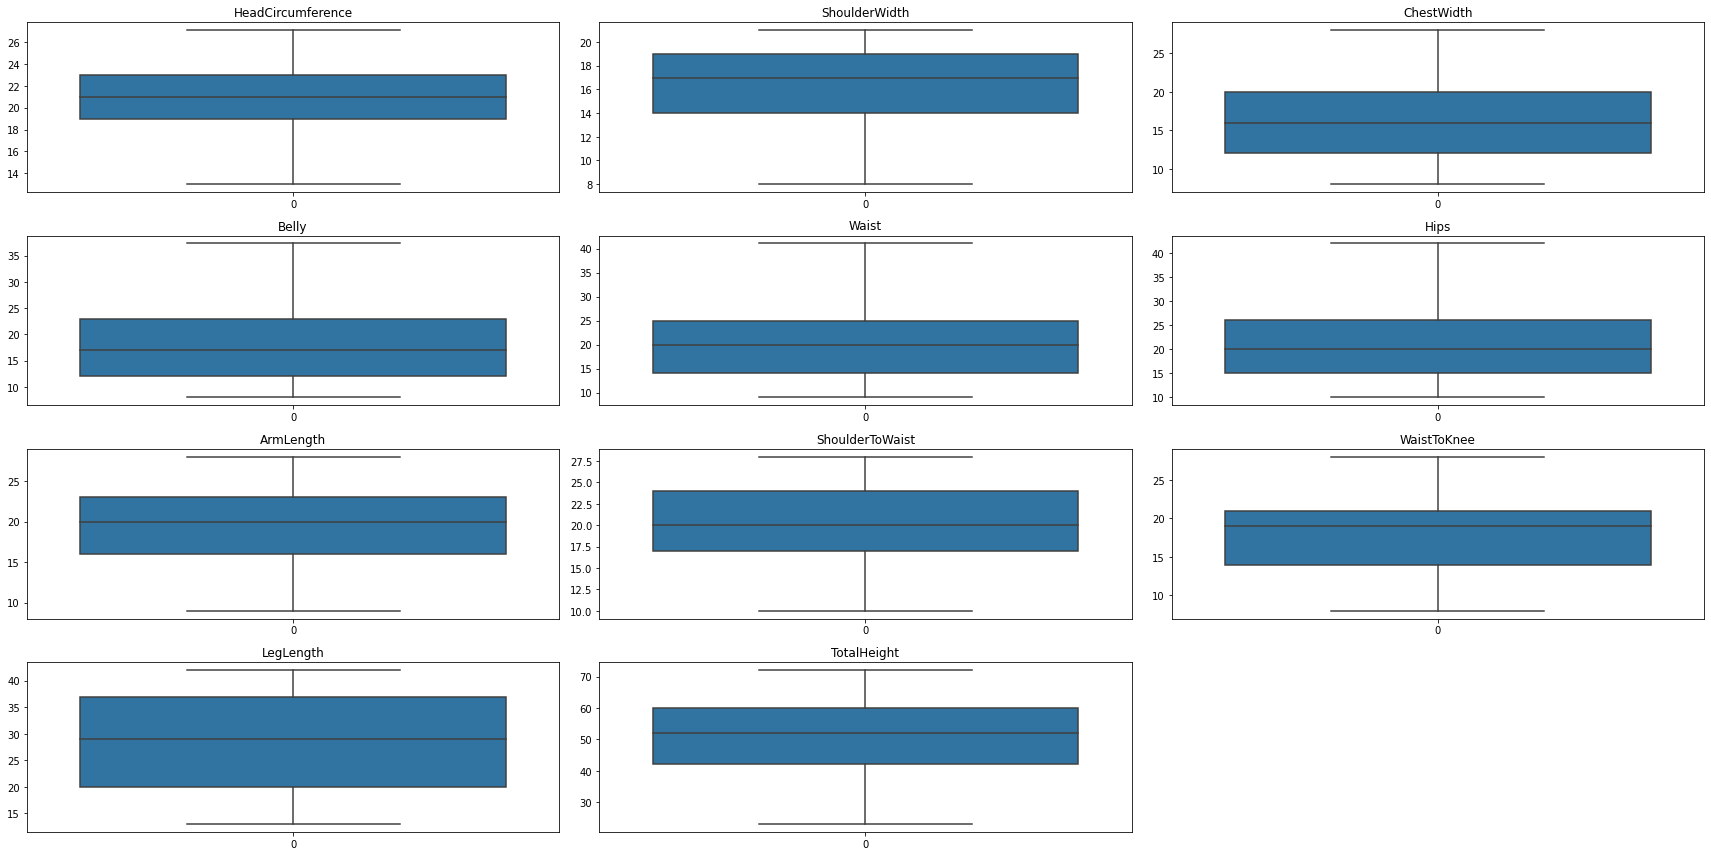

In [12]:
# Selecting only continuous variables
continuous_vars = ['HeadCircumference', 'ShoulderWidth', 'ChestWidth', 'Belly',
       'Waist', 'Hips', 'ArmLength', 'ShoulderToWaist', 'WaistToKnee',
       'LegLength', 'TotalHeight']

# Plot boxplots for continuous variables to detect outliers
plt.figure(figsize=(24, 12))
for i, var in enumerate(continuous_vars):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

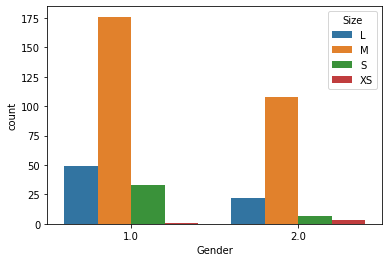

In [13]:
sns.countplot(data=df, x = 'Gender', hue = 'Size')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [15]:
data = df
X = data.drop(columns=['Size'])  # Features
y = data['Size']  # Target
print(X, y)

     Gender  HeadCircumference  ShoulderWidth  ChestWidth  Belly  Waist  Hips  \
0       1.0               27.1           18.0        20.0   18.0   14.0  22.0   
1       1.0               19.0           21.0        17.0   18.0   21.0  25.0   
2       2.0               21.0           18.0        16.0   14.0   10.0  15.0   
3       1.0               20.0           20.0        18.0   11.0   19.0  14.0   
4       2.0               16.0           14.0        18.0   13.0   11.0  30.0   
..      ...                ...            ...         ...    ...    ...   ...   
394     1.0               18.0           18.0         9.0   19.0   12.0  10.0   
395     1.0               20.0           12.0         9.0   10.0   23.0  10.0   
396     1.0               21.0           13.0        11.0   10.0   21.0  10.0   
397     1.0               20.0           17.0        11.0   22.0   22.0  22.0   
398     1.0               20.0            9.0         9.0   20.0   20.0  10.0   

     ArmLength  ShoulderToW

In [16]:
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])  # Label encoding for 'Gender'

In [17]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

     Gender  HeadCircumference  ShoulderWidth  ChestWidth  Belly  Waist  Hips  \
3         0               20.0           20.0        18.0   11.0   19.0  14.0   
18        0               20.0           16.0        28.0   18.0   17.0  23.0   
377       1               19.0            9.0        16.0   20.0   18.0  21.0   
248       1               13.0           21.0        15.0   13.0   12.0  14.0   
177       1               21.0           14.0        15.0   21.0   14.0  12.0   
..      ...                ...            ...         ...    ...    ...   ...   
71        0               15.0            8.0         8.0    8.0    9.0  10.0   
106       0               23.0           16.0        11.0   10.0   14.0  14.0   
270       0               27.1           20.0        28.0   30.0   32.0  38.0   
348       0               22.0           14.0        16.0   34.0   20.0  38.0   
102       1               20.0           19.0        13.0   12.0   16.0  17.0   

     ArmLength  ShoulderToW

In [18]:
#Initialize the model
rf = RandomForestClassifier(random_state=42)
gnb = GaussianNB()
mnb = MultinomialNB()

In [19]:
#Training the Models
rf.fit(X_train, y_train)
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)


MultinomialNB()

In [20]:
#Predictions
y_pred_rf = rf.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)

In [21]:
#Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf * 100, "%")
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Accuracy:", accuracy_gnb * 100, "%")
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print("Multinomial Naive Bayes Accuracy:", accuracy_mnb * 100, "%")

Random Forest Accuracy: 96.25 %
Gaussian Naive Bayes Accuracy: 93.75 %
Multinomial Naive Bayes Accuracy: 53.75 %


In [22]:
rf.predict([X.iloc[6]])

array(['S'], dtype=object)

In [23]:
y.iloc[6]

'S'